The idea is to do 3 rnn 
1) pure tf 
2) skflow
3) keras

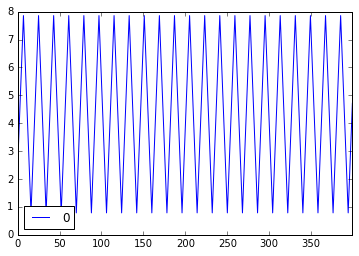

In [9]:
###dataset

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd  
from random import random

flow = (list(range(1,10,1)) + list(range(10,1,-1)))*1000  
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random()  # some noise  

import numpy as np

def _load_data(data, n_prev = 400):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

ntrn = int(round(len(data) * (1 - 0.1)))
X_train, y_train = _load_data(data.iloc[0:ntrn])

pd.DataFrame(X_train[1,:,1]).plot()

In [12]:
x = X_train[1,:,1]

In [ ]:
more info when searching for sklearn RNNRegressor

In [ ]:
https://github.com/tensorflow/skflow/issues/161

In [106]:
#REGRESSION 
#Minimal Working example
import random
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow.contrib import skflow
import tensorflow as tf



def input_fn(X):
    return tf.split(1, 1, X)

targets = np.array(list([10, 16, 10, 16]), dtype=np.float32)
test_data = np.array(list([[1, 3, 3, 2, 1], [2, 3, 4, 5, 6]]))

random.seed(42)
data = np.array(list([[2, 1, 2, 2, 3],
[2, 2, 3, 4, 5],
[3, 3, 1, 2, 1],
[2, 4, 5, 4, 1]]), dtype=np.float32)

regressor = skflow.TensorFlowRNNRegressor(rnn_size=50, cell_type='gru', input_op_fn=input_fn)
regressor.fit(data, targets)
regressor.weights_
regressor.bias_
predictions = regressor.predict(np.array(test_data))
predictions

array([[ 11.87805176],
       [ 17.21040344]], dtype=float32)

it looks like the data that is passed to into the RNN is a a vector of all the values for each time step, so if we have 5 time steps 

  [1,2,3,4,5]
  [6,7,8,9,10] 
  
we slice the tensor across the step dimension as 
[1,6] [2,7] [3,8] etc this is weird to my brain
here is the basic tensorflow example: 

In [96]:
np.array(t)

array([[[ 1.,  3.,  3.,  2.,  1.],
        [ 2.,  3.,  4.,  5.,  6.]]], dtype=float32)

In [129]:
X = tf.placeholder(tf.float32, [None, 5], name = 'input_data')
splitter = tf.split(1,1,X)
with tf.Session() as sess:
    t = sess.run(splitter, feed_dict= {X:test_data})
np.array(t)

array([[[ 1.,  3.,  3.,  2.,  1.],
        [ 2.,  3.,  4.,  5.,  6.]]], dtype=float32)

#### Saw data 

In [164]:
#x is generated above 
# we fit x_T 

import random
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow.contrib import skflow
import tensorflow as tf

def input_fn(X):
    return tf.split(1, 1, X)


In [165]:
def create_training(x, n=len(x), seq_length=20):    
    x_t = np.asarray([x[i:i+seq_length] for i in range(n-seq_length)])
    y_t = np.asarray([x[i+seq_length] for i in range(n-seq_length)])
    return x_t, y_t

In [166]:
x_t, y_t = create_training(x)

In [167]:
print(x_t[0], y_t[0])

(array([ 2.35717479,  3.14289972,  3.92862465,  4.71434958,  5.50007451,
        6.28579944,  7.07152437,  7.85724931,  7.07152437,  6.28579944,
        5.50007451,  4.71434958,  3.92862465,  3.14289972,  2.35717479,
        1.57144986,  0.78572493,  1.57144986,  2.35717479,  3.14289972]), 3.9286246525434758)


In [168]:
regressor = skflow.TensorFlowRNNRegressor(rnn_size=512, cell_type='lstm', input_op_fn=input_fn)
regressor.fit(x_t, y_t)
regressor.weights_
regressor.bias_
#predictions = regressor.predict(np.array(test_data))
regressor.predict(x_t[0:1])

array([[ 4.10976458]], dtype=float32)

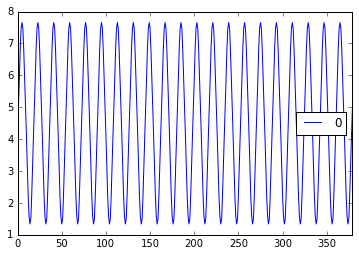

In [169]:
#Can we overfit the data? 
#yes!
pd.DataFrame([regressor.predict(x_t[i:i+1])[0][0] for i in range(len(x_t))]).plot()

In [170]:
#We can then seed the sample with the first 20 from our real data, and let the nerual network
#generate new lines 

In [171]:
generated = []
seed = x_t[:1,:20]
for i in range(200):
    seed.shape = (1,20)
    y_hat = regressor.predict(seed)[0][0]
    new_seed = np.hstack((seed[0],y_hat))
    generated.append(y_hat)
    seed = new_seed[1:]
    

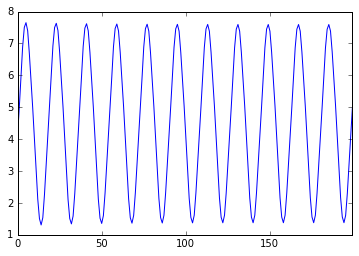

In [172]:
#it works
pd.Series(generated).plot()

In [53]:
X = tf.placeholder(tf.float32, [None, 20], name = 'input_data')

In [60]:
splitter = tf.split(1, 20, X)


In [61]:
with tf.Session() as sess:
    t = sess.run(splitter, feed_dict= {X:x_t[:1]})
    print(t[0].shape)

(1, 1)


In [1]:
import numpy as np
from sklearn import metrics
import tensorflow as tf 
from tensorflow.contrib import skflow


#Notes 
#The number of lstm units is 1 

In [6]:
#Source for the TensorFlowRNN Regressor

In [ ]:
class TensorFlowRNNRegressor(TensorFlowEstimator, RegressorMixin):
    """TensorFlow RNN Regressor model.
    Parameters:
        rnn_size: The size for rnn cell, e.g. size of your word embeddings.
        cell_type: The type of rnn cell, including rnn, gru, and lstm.
        num_layers: The number of layers of the rnn model.
        input_op_fn: Function that will transform the input tensor, such as
                     creating word embeddings, byte list, etc. This takes
                     an argument X for input and returns transformed X.
        bidirectional: boolean, Whether this is a bidirectional rnn.
        sequence_length: If sequence_length is provided, dynamic calculation is performed.
                 This saves computational time when unrolling past max sequence length.
        initial_state: An initial state for the RNN. This must be a tensor of appropriate type
                       and shape [batch_size x cell.state_size].
        tf_master: TensorFlow master. Empty string is default for local.
        batch_size: Mini batch size.
        steps: Number of steps to run over data.
        optimizer: Optimizer name (or class), for example "SGD", "Adam",
                   "Adagrad".
        learning_rate: If this is constant float value, no decay function is used.
            Instead, a customized decay function can be passed that accepts
            global_step as parameter and returns a Tensor.
            e.g. exponential decay function:
            def exp_decay(global_step):
                return tf.train.exponential_decay(
                    learning_rate=0.1, global_step,
                    decay_steps=2, decay_rate=0.001)
        tf_random_seed: Random seed for TensorFlow initializers.
            Setting this value, allows consistency between reruns.
        continue_training: when continue_training is True, once initialized
            model will be continuely trained on every call of fit.
        num_cores: Number of cores to be used. (default: 4)
        verbose: Controls the verbosity, possible values:
                 0: the algorithm and debug information is muted.
                 1: trainer prints the progress.
                 2: log device placement is printed.
        max_to_keep: The maximum number of recent checkpoint files to keep.
            As new files are created, older files are deleted.
            If None or 0, all checkpoint files are kept.
            Defaults to 5 (that is, the 5 most recent checkpoint files are kept.)
        keep_checkpoint_every_n_hours: Number of hours between each checkpoint
            to be saved. The default value of 10,000 hours effectively disables the feature.
   """

    def __init__(self, rnn_size, cell_type='gru', num_layers=1,
                 input_op_fn=null_input_op_fn, initial_state=None,
                 bidirectional=False, sequence_length=None,
                 n_classes=0, tf_master="", batch_size=32,
                 steps=50, optimizer="SGD", learning_rate=0.1,
                 tf_random_seed=42, continue_training=False,
                 config_addon=None, verbose=1,
                 max_to_keep=5, keep_checkpoint_every_n_hours=10000):

        self.rnn_size = rnn_size
        self.cell_type = cell_type
        self.input_op_fn = input_op_fn
        self.bidirectional = bidirectional
        self.num_layers = num_layers
        self.sequence_length = sequence_length
        self.initial_state = initial_state
        super(TensorFlowRNNRegressor, self).__init__(
            model_fn=self._model_fn,
            n_classes=n_classes, tf_master=tf_master,
            batch_size=batch_size, steps=steps, optimizer=optimizer,
            learning_rate=learning_rate, tf_random_seed=tf_random_seed,
            continue_training=continue_training, config_addon=config_addon,
            verbose=verbose, max_to_keep=max_to_keep,
            keep_checkpoint_every_n_hours=keep_checkpoint_every_n_hours)

    def _model_fn(self, X, y):
        return models.get_rnn_model(self.rnn_size, self.cell_type,
                                    self.num_layers,
                                    self.input_op_fn, self.bidirectional,
                                    models.linear_regression,
                                    self.sequence_length,
                                    self.initial_state)(X, y)


In [ ]:
def get_rnn_model(rnn_size, cell_type, num_layers, input_op_fn,
                  bidirectional, target_predictor_fn,
                  sequence_length, initial_state):
    """Returns a function that creates a RNN TensorFlow subgraph with given
    params.
    Args:
        rnn_size: The size for rnn cell, e.g. size of your word embeddings.
        cell_type: The type of rnn cell, including rnn, gru, and lstm.
        num_layers: The number of layers of the rnn model.
        input_op_fn: Function that will transform the input tensor, such as
                     creating word embeddings, byte list, etc. This takes
                     an argument X for input and returns transformed X.
        bidirectional: boolean, Whether this is a bidirectional rnn.
        target_predictor_fn: Function that will predict target from input
                             features. This can be logistic regression,
                             linear regression or any other model,
                             that takes X, y and returns predictions and loss tensors.
        sequence_length: If sequence_length is provided, dynamic calculation is performed.
                         This saves computational time when unrolling past max sequence length.
                         Required for bidirectional RNNs.
        initial_state: An initial state for the RNN. This must be a tensor of appropriate type
                       and shape [batch_size x cell.state_size].
    Returns:
        A function that creates the subgraph.
    """
    def rnn_estimator(X, y):
        """RNN estimator with target predictor function on top."""
        X = input_op_fn(X)
        if cell_type == 'rnn':
            cell_fn = tf.nn.rnn_cell.BasicRNNCell
        elif cell_type == 'gru':
            cell_fn = tf.nn.rnn_cell.GRUCell
        elif cell_type == 'lstm':
            cell_fn = tf.nn.rnn_cell.BasicLSTMCell
        else:
            raise ValueError("cell_type {} is not supported. ".format(cell_type))
        if bidirectional:
            # forward direction cell
            rnn_fw_cell = tf.nn.rnn_cell.MultiRNNCell([cell_fn(rnn_size)] * num_layers)
            # backward direction cell
            rnn_bw_cell = tf.nn.rnn_cell.MultiRNNCell([cell_fn(rnn_size)] * num_layers)
            # pylint: disable=unexpected-keyword-arg, no-value-for-parameter
            _, encoding = bidirectional_rnn(rnn_fw_cell, rnn_bw_cell, X,
                                            dtype=tf.float32,
                                            sequence_length=sequence_length,
                                            initial_state_fw=initial_state,
                                            initial_state_bw=initial_state)
        else:
            cell = tf.nn.rnn_cell.MultiRNNCell([cell_fn(rnn_size)] * num_layers)
            _, encoding = tf.nn.rnn(cell, X, dtype=tf.float32,
                                    sequence_length=sequence_length,
                                    initial_state=initial_state)
        return target_predictor_fn(encoding, y)
    return rnn_estimator

In [77]:

#train = pandas.read_csv('dbpedia_csv/train.csv', header=None)
#X_train, y_train = train[2], train[0]
#test = pandas.read_csv('dbpedia_csv/test.csv', header=None)
#X_test, y_test = test[2], test[0]

### Process vocabulary

#MAX_DOCUMENT_LENGTH = 10

#vocab_processor = skflow.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH)
#X_train = np.array(list(vocab_processor.fit_transform(X_train)))
#X_test = np.array(list(vocab_processor.transform(X_test)))

#n_words = len(vocab_processor.vocabulary_)
#print('Total words: %d' % n_words)

### Models

#EMBEDDING_SIZE = 50

# Customized function to transform batched X into embeddings

input_op_fn = lambda x:x


# Single direction GRU with a single layer
classifier = skflow.TensorFlowRNNRegressor(rnn_size=1, 
     cell_type='gru',  batch_size = 1, 
    num_layers=1, bidirectional=False, sequence_length=None,
    steps=1000, optimizer='Adam', learning_rate=0.01, continue_training=True)

# Continously train for 1000 steps & predict on test set.
#while True:
#    classifier.fit(X_train, y_train, logdir='/tmp/tf_examples/word_rnn')
#    score = metrics.accuracy_score(y_test, classifier.predict(X_test))
#    print('Accuracy: {0:f}'.format(score))



In [39]:
import pandas as pd

train = pandas.read_csv('dbpedia_csv/train.csv', header=None)
X_train, y_train = train[2], train[0]
test = pandas.read_csv('dbpedia_csv/test.csv', header=None)
X_test, y_test = test[2], test[0]

### Process vocabulary

MAX_DOCUMENT_LENGTH = 10


vocab_processor = skflow.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH)
X_train = np.array(list(vocab_processor.fit_transform(X_train)))
X_test = np.array(list(vocab_processor.transform(X_test)))

n_words = len(vocab_processor.vocabulary_)
print('Total words: %d' % n_words)


Total words: 743040


In [42]:
def input_op_fn(X):
    # Convert indexes of words into embeddings.
    # This creates embeddings matrix of [n_words, EMBEDDING_SIZE] and then
    # maps word indexes of the sequence into [batch_size, sequence_length,
    # EMBEDDING_SIZE].
    word_vectors = skflow.ops.categorical_variable(X, n_classes=n_words,
        embedding_size=EMBEDDING_SIZE, name='words')
    # Split into list of embedding per word, while removing doc length dim.
    # word_list results to be a list of tensors [batch_size, EMBEDDING_SIZE].
    word_list = skflow.ops.split_squeeze(1, MAX_DOCUMENT_LENGTH, word_vectors)
    return word_list

In [44]:
EMBEDDING_SIZE = 50
t = input_op_fn(X_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [82]:
train = pandas.read_csv('dbpedia_csv/train.csv', header=None)
X_train, y_train = train[2], train[0]
test = pandas.read_csv('dbpedia_csv/test.csv', header=None)
X_test, y_test = test[2], test[0]

### Process vocabulary

MAX_DOCUMENT_LENGTH = 10


vocab_processor = skflow.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH)
X_train = np.array(list(vocab_processor.fit_transform(X_train)))
X_test = np.array(list(vocab_processor.transform(X_test)))

n_words = len(vocab_processor.vocabulary_)
print('Total words: %d' % n_words)

### Models

EMBEDDING_SIZE = 50

# Customized function to transform batched X into embeddings
def input_op_fn(X):
    # Convert indexes of words into embeddings.
    # This creates embeddings matrix of [n_words, EMBEDDING_SIZE] and then
    # maps word indexes of the sequence into [batch_size, sequence_length,
    # EMBEDDING_SIZE].
    word_vectors = skflow.ops.categorical_variable(X, n_classes=n_words,
        embedding_size=EMBEDDING_SIZE, name='words')
    # Split into list of embedding per word, while removing doc length dim.
    # word_list results to be a list of tensors [batch_size, EMBEDDING_SIZE].
    word_list = skflow.ops.split_squeeze(1, MAX_DOCUMENT_LENGTH, word_vectors)
    return word_list

# Single direction GRU with a single layer
classifier = skflow.TensorFlowRNNClassifier(rnn_size=EMBEDDING_SIZE, 
    n_classes=15, cell_type='gru', input_op_fn=input_op_fn,
    num_layers=1, bidirectional=False, sequence_length=None,
    steps=1000, optimizer='Adam', learning_rate=0.01, continue_training=True)

# Continously train for 1000 steps & predict on test set.
#while True:
#    classifier.fit(X_train, y_train, logdir='/tmp/tf_examples/word_rnn')
#    score = metrics.accuracy_score(y_test, classifier.predict(X_test))
#    print('Accuracy: {0:f}'.format(score))

Total words: 743040


In [85]:
classifier.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:

"""LSTM for time series classification
Made: 30 march 2016
This model takes in time series and class labels.
The LSTM models the time series. A fully-connected layer
generates an output to be classified with Softmax
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from tensorflow.python.ops import clip_ops


def sample_batch(X_train,y_train,batch_size,num_steps):
    """ Function to sample a batch for training"""
    N,data_len = X_train.shape
    ind_N = np.random.choice(N,batch_size,replace=False)
    ind_start = np.random.choice(data_len-num_steps,1)
    #form batch
    X_batch = X_train[ind_N,ind_start:ind_start+num_steps]
    y_batch = y_train[ind_N]
    return X_batch,y_batch
    
def check_test(X_test,y_test,batch_size,num_steps):
    """ Function to check the test_accuracy on the entire test set
    This is a workaround. I haven't figured out yet how to make the graph
    general for multiple batch sizes."""
    N = X_test.shape[0]
    num_batch = np.floor(N/batch_size)
    test_acc = np.zeros(num_batch)
    for i in range(int(num_batch)):
      X_batch, y_batch = sample_batch(X_test,y_test,batch_size,num_steps)
      test_acc[i] = session.run(accuracy,feed_dict = {input_data: X_batch, targets: y_batch, initial_state:state,keep_prob:1})
    return np.mean(test_acc)




"""Hyperparamaters"""
init_scale = 0.08           #Initial scale for the states
max_grad_norm = 25          #Clipping of the gradient before update
num_layers = 2              #Number of stacked LSTM layers
num_steps = 32              #Number of steps to backprop over at every batch
hidden_size = 13            #Number of entries of the cell state of the LSTM
max_iterations = 2000       #Maximum iterations to train
batch_size = 30             #Batch size


"""Place holders"""
input_data = tf.placeholder(tf.float32, [None, num_steps], name = 'input_data')
targets = tf.placeholder(tf.int64, [None], name='Targets')
#Used later on for drop_out. At testtime, we pass 1.0
keep_prob = tf.placeholder("float", name = 'Drop_out_keep_prob')  

initializer = tf.random_uniform_initializer(-init_scale,init_scale)
with tf.variable_scope("model", initializer=initializer):
  """Define the basis LSTM"""
  with tf.name_scope("LSTM_setup") as scope:
    lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(hidden_size)
    if keep_prob < 1:
      lstm_cell = tf.nn.rnn_cell.DropoutWrapper(lstm_cell, output_keep_prob=keep_prob)
      cell = tf.nn.rnn_cell.MultiRNNCell([lstm_cell] * num_layers)
    initial_state = cell.zero_state(batch_size, tf.float32)   #Initialize the zero_state. Note that it has to be run in session-time
    #We have only one input dimension, but we generalize our code for future expansion
    inputs = tf.expand_dims(input_data, 2)

  #Define the recurrent nature of the LSTM
  #Re-use variables only after first time-step
  with tf.name_scope("LSTM") as scope:
    outputs = []
    state = initial_state
    with tf.variable_scope("LSTM_state"):
      for time_step in range(num_steps):
       if time_step > 0: tf.get_variable_scope().reuse_variables()
       (cell_output, state) = cell(inputs[:, time_step, :], state)
       outputs.append(cell_output)       #Now cell_output is size [batch_size x hidden_size]


#Generate a classification from the last cell_output
#Note, this is where timeseries classification differs from sequence to sequence
#modelling. We only output to Softmax at last time step
with tf.name_scope("Softmax") as scope:
  with tf.variable_scope("Softmax_params"): 
    # Both datasets have four output classes. Improve the code by changing the 4
    # into a hyperparameter
    softmax_w = tf.get_variable("softmax_w", [hidden_size, 4])                         
    softmax_b = tf.get_variable("softmax_b", [4])                               
  logits = tf.matmul(cell_output, softmax_w) + softmax_b
  #Use sparse Softmax because we have mutually exclusive classes    
  loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits,targets,name = 'Sparse_softmax')
  cost = tf.reduce_sum(loss) / batch_size
  #Pass on a summary to Tensorboard
  cost_summ = tf.scalar_summary('Cost',cost)
  # Calculate the accuracy
  correct_prediction = tf.equal(tf.argmax(logits,1), targets)
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  accuracy_summary = tf.scalar_summary("accuracy", accuracy)


"""Optimizer"""
with tf.name_scope("Optimizer") as scope:
  tvars = tf.trainable_variables()
  #We clip the gradients to prevent explosion
  grads, _ = tf.clip_by_global_norm(tf.gradients(cost, tvars),max_grad_norm)
  optimizer = tf.train.AdamOptimizer(8e-3)
  gradients = zip(grads, tvars)
  train_op = optimizer.apply_gradients(gradients)
  # Add histograms for variables, gradients and gradient norms.
  # The for-loop loops over all entries of the gradient and plots
  # a histogram. We cut of
  for gradient, variable in gradients:
    if isinstance(gradient, ops.IndexedSlices):
      grad_values = gradient.values
    else:
      grad_values = gradient
    h1 = tf.histogram_summary(variable.name, variable)
    h2 = tf.histogram_summary(variable.name + "/gradients", grad_values)
    h3 = tf.histogram_summary(variable.name + "/gradient_norm", clip_ops.global_norm([grad_values]))
  
"""Load the data"""
dummy = True
if dummy:
  data_train = np.loadtxt('UCR_TS_Archive_2015/Two_Patterns/Two_Patterns_TRAIN',delimiter=',')
  data_test_val = np.loadtxt('UCR_TS_Archive_2015/Two_Patterns/Two_Patterns_TEST',delimiter=',')
else:
  data_train = np.loadtxt('data_train_dummy',delimiter=',')
  data_test_val = np.loadtxt('data_test_dummy',delimiter=',')
data_test,data_val = np.split(data_test_val,2)
X_train = data_train[:,1:]
X_val = data_val[:,1:]
X_test = data_test[:,1:]
N = X_train.shape[0]
Ntest = X_test.shape[0]
# Targets have labels 1-indexed. We subtract one for 0-indexed
y_train = data_train[:,0]-1
y_val = data_val[:,0]-1
y_test = data_test[:,0]-1

#Final code for the TensorBoard
merged = tf.merge_all_summaries()


# Collect the costs in a numpy fashion
epochs = np.floor(batch_size*max_iterations / N)
print('Train with approximately %d epochs' %(epochs))
perf_collect = np.zeros((3,int(np.floor(max_iterations /100))))

"""Session time"""
with tf.Session() as session:
  writer = tf.train.SummaryWriter("/home/rob/Dropbox/ml_projects/LSTM/log_tb", session.graph_def)
  tf.initialize_all_variables().run()
  
  
  step = 0
  for i in range(max_iterations):
    
    # Calculate some sizes
    N = X_train.shape[0]
    
    #Sample batch for training
    X_batch, y_batch = sample_batch(X_train,y_train,batch_size,num_steps)
    state = initial_state.eval()  #Fire up the LSTM
    
    #Next line does the actual training
    session.run(train_op,feed_dict = {input_data: X_batch,targets: y_batch,initial_state: state,keep_prob:0.5})
    if i==0:
        # Uset this line to check before-and-after test accuracy
        acc_test_before = check_test(X_test,y_test,batch_size,num_steps)
    if i%100 == 0:
      #Evaluate training performance
      X_batch, y_batch = sample_batch(X_train,y_train,batch_size,num_steps)                           
      cost_out = session.run(cost,feed_dict = {input_data: X_batch, targets: y_batch, initial_state:state,keep_prob:1})
      perf_collect[0,step] = cost_out
      #print('At %d out of %d train cost is %.3f' %(i,max_iterations,cost_out)) #Uncomment line to follow train cost

      #Evaluate validation performance
      X_batch, y_batch = sample_batch(X_val,y_val,batch_size,num_steps)
      result = session.run([cost,merged,accuracy],feed_dict = {input_data: X_batch, targets: y_batch, initial_state:state,keep_prob:1})
      cost_out = result[0]
      perf_collect[1,step] = cost_out
      acc_val = result[2]
      perf_collect[2,step] = acc_val
      print('At %d out of %d val cost is %.3f and val acc is %.3f' %(i,max_iterations,cost_out,acc_val))
      
      #Write information to TensorBoard
      summary_str = result[1]
      writer.add_summary(summary_str, i)
      writer.flush()
      
      step +=1
  acc_test = check_test(X_test,y_test,batch_size,num_steps)

"""Additional plots"""
print('The accuracy on the test data is %.3f, before training was %.3f' %(acc_test,acc_test_before))
plt.plot(perf_collect[0],label='Train')
plt.plot(perf_collect[1],label = 'Valid')
plt.plot(perf_collect[2],label = 'Valid accuracy')
plt.axis([0, step, 0, np.max(perf_collect)])
plt.legend()
plt.show("""LSTM for time series classification
Made: 30 march 2016
This model takes in time series and class labels.
The LSTM models the time series. A fully-connected layer
generates an output to be classified with Softmax
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from tensorflow.python.ops import clip_ops


def sample_batch(X_train,y_train,batch_size,num_steps):
    """ Function to sample a batch for training"""
    N,data_len = X_train.shape
    ind_N = np.random.choice(N,batch_size,replace=False)
    ind_start = np.random.choice(data_len-num_steps,1)
    #form batch
    X_batch = X_train[ind_N,ind_start:ind_start+num_steps]
    y_batch = y_train[ind_N]
    return X_batch,y_batch
    
def check_test(X_test,y_test,batch_size,num_steps):
    """ Function to check the test_accuracy on the entire test set
    This is a workaround. I haven't figured out yet how to make the graph
    general for multiple batch sizes."""
    N = X_test.shape[0]
    num_batch = np.floor(N/batch_size)
    test_acc = np.zeros(num_batch)
    for i in range(int(num_batch)):
      X_batch, y_batch = sample_batch(X_test,y_test,batch_size,num_steps)
      test_acc[i] = session.run(accuracy,feed_dict = {input_data: X_batch, targets: y_batch, initial_state:state,keep_prob:1})
    return np.mean(test_acc)




"""Hyperparamaters"""
init_scale = 0.08           #Initial scale for the states
max_grad_norm = 25          #Clipping of the gradient before update
num_layers = 2              #Number of stacked LSTM layers
num_steps = 32              #Number of steps to backprop over at every batch
hidden_size = 13            #Number of entries of the cell state of the LSTM
max_iterations = 2000       #Maximum iterations to train
batch_size = 30             #Batch size


"""Place holders"""
input_data = tf.placeholder(tf.float32, [None, num_steps], name = 'input_data')
targets = tf.placeholder(tf.int64, [None], name='Targets')
#Used later on for drop_out. At testtime, we pass 1.0
keep_prob = tf.placeholder("float", name = 'Drop_out_keep_prob')  

initializer = tf.random_uniform_initializer(-init_scale,init_scale)
with tf.variable_scope("model", initializer=initializer):
  """Define the basis LSTM"""
  with tf.name_scope("LSTM_setup") as scope:
    lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(hidden_size)
    if keep_prob < 1:
      lstm_cell = tf.nn.rnn_cell.DropoutWrapper(lstm_cell, output_keep_prob=keep_prob)
      cell = tf.nn.rnn_cell.MultiRNNCell([lstm_cell] * num_layers)
    initial_state = cell.zero_state(batch_size, tf.float32)   #Initialize the zero_state. Note that it has to be run in session-time
    #We have only one input dimension, but we generalize our code for future expansion
    inputs = tf.expand_dims(input_data, 2)

  #Define the recurrent nature of the LSTM
  #Re-use variables only after first time-step
  with tf.name_scope("LSTM") as scope:
    outputs = []
    state = initial_state
    with tf.variable_scope("LSTM_state"):
      for time_step in range(num_steps):
       if time_step > 0: tf.get_variable_scope().reuse_variables()
       (cell_output, state) = cell(inputs[:, time_step, :], state)
       outputs.append(cell_output)       #Now cell_output is size [batch_size x hidden_size]


#Generate a classification from the last cell_output
#Note, this is where timeseries classification differs from sequence to sequence
#modelling. We only output to Softmax at last time step
with tf.name_scope("Softmax") as scope:
  with tf.variable_scope("Softmax_params"): 
    # Both datasets have four output classes. Improve the code by changing the 4
    # into a hyperparameter
    softmax_w = tf.get_variable("softmax_w", [hidden_size, 4])                         
    softmax_b = tf.get_variable("softmax_b", [4])                               
  logits = tf.matmul(cell_output, softmax_w) + softmax_b
  #Use sparse Softmax because we have mutually exclusive classes    
  loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits,targets,name = 'Sparse_softmax')
  cost = tf.reduce_sum(loss) / batch_size
  #Pass on a summary to Tensorboard
  cost_summ = tf.scalar_summary('Cost',cost)
  # Calculate the accuracy
  correct_prediction = tf.equal(tf.argmax(logits,1), targets)
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  accuracy_summary = tf.scalar_summary("accuracy", accuracy)


"""Optimizer"""
with tf.name_scope("Optimizer") as scope:
  tvars = tf.trainable_variables()
  #We clip the gradients to prevent explosion
  grads, _ = tf.clip_by_global_norm(tf.gradients(cost, tvars),max_grad_norm)
  optimizer = tf.train.AdamOptimizer(8e-3)
  gradients = zip(grads, tvars)
  train_op = optimizer.apply_gradients(gradients)
  # Add histograms for variables, gradients and gradient norms.
  # The for-loop loops over all entries of the gradient and plots
  # a histogram. We cut of
  for gradient, variable in gradients:
    if isinstance(gradient, ops.IndexedSlices):
      grad_values = gradient.values
    else:
      grad_values = gradient
    h1 = tf.histogram_summary(variable.name, variable)
    h2 = tf.histogram_summary(variable.name + "/gradients", grad_values)
    h3 = tf.histogram_summary(variable.name + "/gradient_norm", clip_ops.global_norm([grad_values]))
  
"""Load the data"""
dummy = True
if dummy:
  data_train = np.loadtxt('UCR_TS_Archive_2015/Two_Patterns/Two_Patterns_TRAIN',delimiter=',')
  data_test_val = np.loadtxt('UCR_TS_Archive_2015/Two_Patterns/Two_Patterns_TEST',delimiter=',')
else:
  data_train = np.loadtxt('data_train_dummy',delimiter=',')
  data_test_val = np.loadtxt('data_test_dummy',delimiter=',')
data_test,data_val = np.split(data_test_val,2)
X_train = data_train[:,1:]
X_val = data_val[:,1:]
X_test = data_test[:,1:]
N = X_train.shape[0]
Ntest = X_test.shape[0]
# Targets have labels 1-indexed. We subtract one for 0-indexed
y_train = data_train[:,0]-1
y_val = data_val[:,0]-1
y_test = data_test[:,0]-1

#Final code for the TensorBoard
merged = tf.merge_all_summaries()


# Collect the costs in a numpy fashion
epochs = np.floor(batch_size*max_iterations / N)
print('Train with approximately %d epochs' %(epochs))
perf_collect = np.zeros((3,int(np.floor(max_iterations /100))))

"""Session time"""
with tf.Session() as session:
  writer = tf.train.SummaryWriter("/home/rob/Dropbox/ml_projects/LSTM/log_tb", session.graph_def)
  tf.initialize_all_variables().run()
  
  
  step = 0
  for i in range(max_iterations):
    
    # Calculate some sizes
    N = X_train.shape[0]
    
    #Sample batch for training
    X_batch, y_batch = sample_batch(X_train,y_train,batch_size,num_steps)
    state = initial_state.eval()  #Fire up the LSTM
    
    #Next line does the actual training
    session.run(train_op,feed_dict = {input_data: X_batch,targets: y_batch,initial_state: state,keep_prob:0.5})
    if i==0:
        # Uset this line to check before-and-after test accuracy
        acc_test_before = check_test(X_test,y_test,batch_size,num_steps)
    if i%100 == 0:
      #Evaluate training performance
      X_batch, y_batch = sample_batch(X_train,y_train,batch_size,num_steps)                           
      cost_out = session.run(cost,feed_dict = {input_data: X_batch, targets: y_batch, initial_state:state,keep_prob:1})
      perf_collect[0,step] = cost_out
      #print('At %d out of %d train cost is %.3f' %(i,max_iterations,cost_out)) #Uncomment line to follow train cost

      #Evaluate validation performance
      X_batch, y_batch = sample_batch(X_val,y_val,batch_size,num_steps)
      result = session.run([cost,merged,accuracy],feed_dict = {input_data: X_batch, targets: y_batch, initial_state:state,keep_prob:1})
      cost_out = result[0]
      perf_collect[1,step] = cost_out
      acc_val = result[2]
      perf_collect[2,step] = acc_val
      print('At %d out of %d val cost is %.3f and val acc is %.3f' %(i,max_iterations,cost_out,acc_val))
      
      #Write information to TensorBoard
      summary_str = result[1]
      writer.add_summary(summary_str, i)
      writer.flush()
      
      step +=1
  acc_test = check_test(X_test,y_test,batch_size,num_steps)

"""Additional plots"""
print('The accuracy on the test data is %.3f, before training was %.3f' %(acc_test,acc_test_before))
plt.plot(perf_collect[0],label='Train')
plt.plot(perf_collect[1],label = 'Valid')
plt.plot(perf_collect[2],label = 'Valid accuracy')
plt.axis([0, step, 0, np.max(perf_collect)])
plt.legend()
plt.show()